In [1]:
import numpy as np

# 라이브러리 import
import requests 
import pprint

In [2]:
### xml을 DataFrame으로 변환하기
from os import name
import xml.etree.ElementTree as ex
import pandas as pd
# import bs4
from lxml import html
from urllib.parse import urlencode, quote_plus, unquote

In [3]:
from tqdm import tqdm, trange

## Load

In [4]:
df = pd.read_csv('msg.csv')

In [5]:
df

,create_date,location_id,location_name,md101_sn,msg,send_platform
0,2023/11/26 17:15:18,151,서울특별시 서초구,207012,"[서울경찰청] 서초구에서 배회중인 이갑세씨(남,81세)를 찾습니다 -171cm,남색...",cbs
1,2023/11/26 16:49:36,50,경기도 포천시,207011,"[경기북부경찰청] 포천시에서 실종된 한말녀씨(여,76세)를 찾습니다 -140cm,4...",cbs
2,2023/11/26 16:07:58,"9736,9737,9738,9739,9744,9746,9747,9748","경기도 이천시,경기도 이천시,경기도 이천시,경기도 이천시,경기도 이천시,경기도 이천...",207010,[이천시] 오늘 15:30경 모가면 소사리 폐차장에서 화재 사고 발생. 검은 연기가...,cbs
3,2023/11/26 13:41:35,137,서울특별시 강남구,207009,"[서울경찰청] 강남구에서 실종된 이갑세씨(남,81세)를 찾습니다 -163cm,남색패...",cbs
4,2023/11/26 13:14:23,174,인천광역시 부평구,207008,"[인천경찰청] 부평구에서 실종된 조태용씨(남,79세)를 찾습니다 -160cm,50k...",cbs
...,...,...,...,...,...,...
185349,2011/11/20 12:10:41,"3,4,5,6,7,9","강원도 강릉시,강원도 고성군,강원도 동해시,강원도 삼척시,강원도 속초시,강원도 양양군",10,"[국민안전처]20일 12시 동해중부먼바다 풍랑경보, 어선은 출항을 금지하고 출어선은...",cbs
185350,2011/11/18 21:12:20,200,전라남도 해남군,9,"[국민안전처] 18일21시10분 전남 해남지역 호우경보, 상습침수및위험지역 대피,외...",cbs
185351,2011/11/18 11:38:36,217,제주특별자치도 전체,8,"[국민안전처] 18일11시30분 제주동부지역 호우경보, 상습침수및위험지역 대피,외출...",cbs
185352,2011/11/18 08:20:05,217,제주특별자치도 전체,7,"[국민안전처] 18일8시20분 제주산간,북부지역 호우경보, 상습침수및위험지역 대피,...",cbs


In [6]:
df.msg

0         [서울경찰청] 서초구에서 배회중인 이갑세씨(남,81세)를 찾습니다 -171cm,남색...
1         [경기북부경찰청] 포천시에서 실종된 한말녀씨(여,76세)를 찾습니다 -140cm,4...
2         [이천시] 오늘 15:30경 모가면 소사리 폐차장에서 화재 사고 발생. 검은 연기가...
3         [서울경찰청] 강남구에서 실종된 이갑세씨(남,81세)를 찾습니다 -163cm,남색패...
4         [인천경찰청] 부평구에서 실종된 조태용씨(남,79세)를 찾습니다 -160cm,50k...
                                ...                        
185349    [국민안전처]20일 12시 동해중부먼바다 풍랑경보, 어선은 출항을 금지하고 출어선은...
185350    [국민안전처] 18일21시10분 전남 해남지역 호우경보, 상습침수및위험지역 대피,외...
185351    [국민안전처] 18일11시30분 제주동부지역 호우경보, 상습침수및위험지역 대피,외출...
185352    [국민안전처] 18일8시20분 제주산간,북부지역 호우경보, 상습침수및위험지역 대피,...
185353    [국민안전처] 18일07:30 제주서부지역 호우경보, 상습침수및위험지역 대피,외출자...
Name: msg, Length: 185354, dtype: object

In [7]:
df.dropna(inplace=True)

In [8]:
import re

In [9]:
p = re.compile('\[([^]]+)')

df['cast'] = df.msg.dropna().apply(lambda x: p.findall(x)).str[0]

In [10]:
p = re.compile('\(([^)]+)')

df['missing'] = df.msg.dropna().apply(lambda x: p.findall(x)).str[0]

In [11]:
df.missing.isna().sum()

57143

In [12]:
df.msg =df.msg.dropna().apply(lambda x: re.sub('\[([^]]+)','',x)).str.strip('] ')

In [13]:
df['age'] = df['msg'].str.extract(r'(\d+세)')

In [14]:
df.age.isna().sum()

159820

In [15]:
df[df.age.isna() == False]

,create_date,location_id,location_name,md101_sn,msg,send_platform,cast,missing,age
0,2023/11/26 17:15:18,151,서울특별시 서초구,207012,"서초구에서 배회중인 이갑세씨(남,81세)를 찾습니다 -171cm,남색패딩조끼,자주색...",cbs,서울경찰청,"남,81세",81세
1,2023/11/26 16:49:36,50,경기도 포천시,207011,"포천시에서 실종된 한말녀씨(여,76세)를 찾습니다 -140cm,43kg,보라색패딩,...",cbs,경기북부경찰청,"여,76세",76세
3,2023/11/26 13:41:35,137,서울특별시 강남구,207009,"강남구에서 실종된 이갑세씨(남,81세)를 찾습니다 -163cm,남색패딩조끼,자주색긴...",cbs,서울경찰청,"남,81세",81세
4,2023/11/26 13:14:23,174,인천광역시 부평구,207008,"부평구에서 실종된 조태용씨(남,79세)를 찾습니다 -160cm,50kg,검정방한모,...",cbs,인천경찰청,"남,79세",79세
5,2023/11/26 12:40:39,126,부산광역시 부산진구,207007,"부산진구에서 배회중인 김재용씨(남,76세)를 찾습니다 -168cm,60kg,남색잠바...",cbs,부산경찰청,"남,76세",76세
...,...,...,...,...,...,...,...,...,...
180253,2020/02/22 11:11:45,214,전라북도 전주시,25607,"전북3번째확진자(36세,남,전북2번째 직장동료)이동경로 1차 방역조치 결과 다솔아동...",cbs,전주시청,"36세,남,전북2번째 직장동료",36세
180257,2020/02/22 11:01:28,214,전라북도 전주시,25603,"1.전북3번째 확진자(36세,남,서신동거주, 전북2번째 확진자 직장동료) 이동결과 ...",cbs,전주시청,"36세,남,서신동거주, 전북2번째 확진자 직장동료",36세
180392,2020/02/20 20:13:48,214,전라북도 전주시,25468,"금일저녁 18시경 김제시 거주 코로나19확진자(28세,남)가 전주 서신동 국민연금공...",cbs,전주시청,"28세,남",28세
180614,2020/02/05 11:18:34,181,전라남도 고흥군,25246,"신종 코로나바이러스 관련, 1/28~2/3 광주21세기병원, 2/3 전남대학교병원에...",cbs,고흥군청,830-6688,21세


In [16]:
len(df)

185292

In [17]:
185292 - 159809

25483

In [18]:
df[df.msg.str.contains('찾습니다') == True]

,create_date,location_id,location_name,md101_sn,msg,send_platform,cast,missing,age
0,2023/11/26 17:15:18,151,서울특별시 서초구,207012,"서초구에서 배회중인 이갑세씨(남,81세)를 찾습니다 -171cm,남색패딩조끼,자주색...",cbs,서울경찰청,"남,81세",81세
1,2023/11/26 16:49:36,50,경기도 포천시,207011,"포천시에서 실종된 한말녀씨(여,76세)를 찾습니다 -140cm,43kg,보라색패딩,...",cbs,경기북부경찰청,"여,76세",76세
3,2023/11/26 13:41:35,137,서울특별시 강남구,207009,"강남구에서 실종된 이갑세씨(남,81세)를 찾습니다 -163cm,남색패딩조끼,자주색긴...",cbs,서울경찰청,"남,81세",81세
4,2023/11/26 13:14:23,174,인천광역시 부평구,207008,"부평구에서 실종된 조태용씨(남,79세)를 찾습니다 -160cm,50kg,검정방한모,...",cbs,인천경찰청,"남,79세",79세
5,2023/11/26 12:40:39,126,부산광역시 부산진구,207007,"부산진구에서 배회중인 김재용씨(남,76세)를 찾습니다 -168cm,60kg,남색잠바...",cbs,부산경찰청,"남,76세",76세
...,...,...,...,...,...,...,...,...,...
175748,2020/03/16 08:37:22,234,충청남도 천안시,30115,"코로나19 확진자 관련, 개인택시 탑승자(2.24~3.3)를 찾습니다. 시홈페이지,...",cbs,천안시청,2.24~3.3,NaN
179379,2020/02/25 18:09:26,248,충청북도 청주시,26481,1.코로나19 확진자 택시 현금 탑승자 2명을 급히 찾습니다. 청주시와 보건소 홈페...,cbs,청주시청,NaN,NaN
179556,2020/02/25 11:11:26,248,충청북도 청주시,26304,코로나19 확진자 택시 현금 탑승자 7명을 급히 찾습니다. 청주시와 보건소 홈페이지...,cbs,청주시청,NaN,NaN
179801,2020/02/24 12:32:22,248,충청북도 청주시,26059,코로나19 확진자 택시 현금 결제자를 찾습니다. 청주시와 보건소 홈페이지에 관련 정...,cbs,청주시청,NaN,NaN


In [19]:
df[df.msg.str.contains('배회|실종') == True]

,create_date,location_id,location_name,md101_sn,msg,send_platform,cast,missing,age
0,2023/11/26 17:15:18,151,서울특별시 서초구,207012,"서초구에서 배회중인 이갑세씨(남,81세)를 찾습니다 -171cm,남색패딩조끼,자주색...",cbs,서울경찰청,"남,81세",81세
1,2023/11/26 16:49:36,50,경기도 포천시,207011,"포천시에서 실종된 한말녀씨(여,76세)를 찾습니다 -140cm,43kg,보라색패딩,...",cbs,경기북부경찰청,"여,76세",76세
3,2023/11/26 13:41:35,137,서울특별시 강남구,207009,"강남구에서 실종된 이갑세씨(남,81세)를 찾습니다 -163cm,남색패딩조끼,자주색긴...",cbs,서울경찰청,"남,81세",81세
4,2023/11/26 13:14:23,174,인천광역시 부평구,207008,"부평구에서 실종된 조태용씨(남,79세)를 찾습니다 -160cm,50kg,검정방한모,...",cbs,인천경찰청,"남,79세",79세
5,2023/11/26 12:40:39,126,부산광역시 부산진구,207007,"부산진구에서 배회중인 김재용씨(남,76세)를 찾습니다 -168cm,60kg,남색잠바...",cbs,부산경찰청,"남,76세",76세
...,...,...,...,...,...,...,...,...,...
166018,2020/07/07 10:19:10,12,강원도 인제군,39848,대북풍선 살포는 주민의 안전을 위협하는 행위입니다. 살포 예상장소를 배회하는 외지차...,cbs,인제군청,NaN,NaN
166021,2020/07/07 10:04:37,4,강원도 고성군,39845,대북물자(풍선.쌀) 살포는 주민안전을 위협하는 행위임을 알려드리며 공터를 배회하는 ...,cbs,고성군청,풍선.쌀,NaN
166072,2020/07/06 17:09:45,8,강원도 양구군,39794,대북풍선 살포는 주민안전을 위협하는 행위임. 농로나 공터를 배회하는 외지차 및 '허...,cbs,양구군청,NaN,NaN
166083,2020/07/06 15:39:56,19,강원도 화천군,39783,대북풍선 살포는 주민안전을 위협하는 행위입니다. 농로나 공터를 배회하는 외지차 및 ...,cbs,화천군청,NaN,NaN


In [20]:
from collections import Counter

In [21]:
df.create_date = pd.to_datetime(df.create_date)

In [22]:
df['year'] = df.create_date.dt.year

In [23]:
df['month'] = df.create_date.dt.month

In [24]:
df['day_of_week'] = df.create_date.dt.day_of_week

<AxesSubplot: xlabel='day_of_week'>

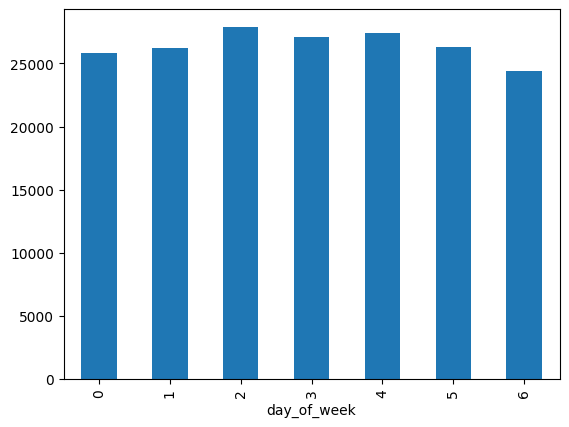

In [25]:
df.groupby(['day_of_week']).count()['msg'].plot(kind='bar')

<AxesSubplot: xlabel='month'>

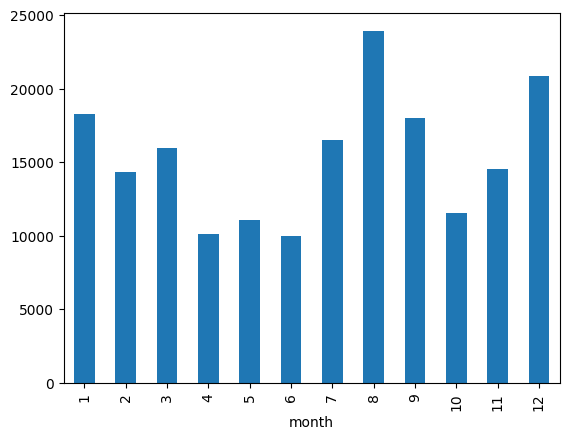

In [26]:
df.groupby(['month']).count()['msg'].plot(kind='bar')

In [27]:
df.msg.sample(100).tolist()

['4월 20일 코로나19 일일 확진자 109명(18,660번~18,768번)발생. 기본 방역 수칙 준수 철저 당부.',
 "코로나19 확산 방지를 위한 연휴기간(5.2~5.5) 종교집회, 모임, 외출 등을 자제하시고 '사회적 거리두기'에 적극 동참하여 주시기 바랍니다.",
 '7월 19일 0시 기준 확진자 550명 발생. 코로나19 예방접종 참여와 방역수칙을 준수하여 주시기 바랍니다.',
 '9월3일 0시기준 확진자 1,205명 / 50대 이상과 18세 이상 기저질환자는 백신 4차접종에 참여 당부드립니다. 접종문의(☎521-2135~8)',
 '▲확진자 1명 발생(양산 확진자의 접촉자), 진주동선 없음 ▲오늘 13:20 현재, 어제 이후 이통장관련 추가 확진자는 없습니다.',
 '서구 181~182번째 확진환자 발생]. 세부내용은 블로그 확인바랍니다. vo.la/8ujFb',
 '6. 29.(수) 9시 기준 확진자 20명 발생. 생활 방역수칙 준수 철저. http://pf.kakao.com/_xkExfhs',
 '2.13(토)검사한 471명 전원 음성. 사적모임 5인 이상 금지, 올바른 마스크 착용 등 개인방역수칙 준수하시고 의심되면 보건소 검사받으시기 바랍니다',
 '내일 아침 기온이 큰 폭으로 떨어져 춥고, 얼음 어는 곳도 있겠으니 보온유지, 도로 살얼음 미끄럼 사고에 유의하시기 바랍니다.',
 "여수시보건소 '학동 여수시보건소' 주차장에 차량안에서 검진을 받을 수 있도록 드라이브스루 선별진료소를 운영중입니다.",
 '8월27일 0시 기준 신규확진자 67명(구미34,경주16,경산7,포항3,울진3,영주1,영덕1,고령1,성주1) 자세한 내용은 시군홈페이지 게재',
 '11.25(수) 확진자 4명 발생(293~296번, 감염경로불명, 창5동 1, 창4동 2, 도봉2동 1). 역학조사결과 조치사항 홈페이지 공개예정',
 '7월 7일 확진자 5명 발생(확진자접촉4, 유증상개별검사1), 자세한 내용은 홈페이지(icheon.go.kr) 및 블로그 참조바랍니다.',
 

In [32]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths=None, fontext='otf')

# 명사 추출 함수 
import stanza

nlp = stanza.Pipeline('ko')

#불용어 1
stopwords = ['▲','있','하', '것', '들', '그', '되', '수', '이', '보','않', '없', '나', '사람', '주', '아니', '등',
             '같', '우리','때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇','위하', '근무', '*', '1', 
             '가능', '2', '3', '4', '5','6', '7', '8', '9', '10', '일하실', '분', '(', ')', '우대', '연령대', 
             '기준', '실시', '지급', '기타', '습니다', '관한', '언제든', '주요','중', '아직', '차차','점차', '에', '들',
             '하실','원하시는', '정년', '배우고', '싶으신','업무', '지원', '시간', '관리', '원', '시', '월', '채용',
             '이상', '후', '관련', '명', '직', '사항', '만', '보조', '따르', 'ᆷ','대', '금', '드리', '자', '경우', '배우', 
             '해당', '플라스틱', '대상', '휴무', '오전', '직무', '제출', '형태', '작성', '별도', '문의', '단순', 
              '요건', '모시', '인근', '구인', '근무지', '학력', '경험', '수행''건강', '결정', '공무', '기본', '이용', '활용', 
             '휴게시','근로자', '증명서','거래처', '중식', '최종', '홈페이지']

def extract_nouns(text):
    doc = nlp(text)
    for sentence in doc.sentences:
        for word in sentence.words:
            lemma = word.lemma.split('+')
            xpos = word.xpos.split('+')
            for lem, pos in zip(lemma, xpos):
                if pos.startswith('n'):
                    if lem not in stopwords:
                        if len(lem) >1:
                            yield lem


2023-11-29 17:25:23 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2023-11-29 17:25:24 INFO: Loading these models for language: ko (Korean):
| Processor | Package        |
------------------------------
| tokenize  | kaist          |
| pos       | kaist_nocharlm |
| lemma     | kaist_nocharlm |
| depparse  | kaist_nocharlm |

2023-11-29 17:25:24 INFO: Using device: cpu
2023-11-29 17:25:24 INFO: Loading: tokenize
2023-11-29 17:25:24 INFO: Loading: pos
2023-11-29 17:25:24 INFO: Loading: lemma
2023-11-29 17:25:24 INFO: Loading: depparse
2023-11-29 17:25:24 INFO: Done loading processors!


In [37]:
safe_msg = df[df.cast =='국민안전처'].msg.dropna()

In [38]:
from keybert import KeyBERT

In [39]:
tqdm.pandas()

In [64]:
safe_msg.tolist()

['26일 06시~08시 인천 중구해안지역 대조기‘주의’단계, 해수면 상승으로 주민,통행객,낚시객은 안전에 유의하세요',
 '26일 04시~06시 군산해안지역 대조기 ‘주의’단계, 해수면상승으로 주민,통행객,낚시객은 안전에 유의하세요!',
 '26일 03시~05시 목포해안지역 대조기 ‘경계’단계, 해수면 상승으로 주민,통행객,낚시객은 안전에 유의하세요!',
 '오늘 21~24시까지 통영해안지역 대조기‘주의’단계, 해수면 상승으로 주민,통행객,낚시객은 안전에 유의하세요',
 '25일 20시~26일 01시 마산해안지역 대조기‘주의’단계, 해수면상승으로 주민,통행객,낚시객은 안전에 유의하세요',
 '안전안내. 오늘 현재 임진강 필승교 수위 1m 초과, 하류 수위 상승 위험, 야영객, 낚시객들은 대피 바랍니다',
 '안전안내, 오늘 12시30분 폭염경보, 최고 35도 이상, 야외활동 자제, 충분한 물마시기 등 건강에 유의바랍니다',
 '안전안내, 오늘 11시00분 폭염주의보, 낮 동안 야외활동 자제 및 물놀이 안전 등에 유의바랍니다',
 '안전안내, 오늘 11시00분 폭염주의보, 낮 동안 야외활동 자제 및 물놀이 안전 등에 유의바랍니다',
 '25일 03~06시까지 군산,영광 해안지역 대조기 주의단계, 해수면 상승으로 주민,통행객,낚시객 안전에 유의하세요!',
 '25일 02~05시까지 목포해안지역 대조기 ‘경계’단계, 해수면 상승으로 주민,통행객,낚시객은 안전에 유의하세요!',
 '오늘 21~23시까지 마산해안지역 대조기 ‘경계’단계, 해수면 상승으로 주민,통행객,낚시객은 안전에 유의하세요!',
 '오늘 20~24시까지 통영해안지역 대조기 ‘주의’단계, 해수면 상승으로 주민,통행객,낚시객은 안전에 유의하세요!',
 '24일 02~04시까지 목포해안지역 대조기 경계, 해수면 상승에 따라 해안가주민,통행객,낚시객은 안전에 유의하세요',
 '오늘 20~23시까지 통영해안지역 대조기주의, 해수면 상승에 따라 해안가주민,통행객,낚시객은 안전에 유의하세요!',
 '오늘 19~

In [44]:
kw_model = KeyBERT()

In [45]:
keywords = safe_msg.progress_apply(lambda x: kw_model.extract_keywords(x, keyphrase_ngram_range=(2,4), use_maxsum = True, top_n = 1))

100%|██████████| 1653/1653 [09:42<00:00,  2.84it/s]


In [54]:
d = Counter([i for k in keywords.tolist() for i in k[0][0].split()])

In [58]:
d.most_common(30)

[('대피', 257),
 ('외출자제', 257),
 ('안전에', 189),
 ('위험지역', 117),
 ('자제', 95),
 ('상습침수및위험지역', 91),
 ('야외활동', 79),
 ('주의하세요', 65),
 ('호우경보', 62),
 ('유지', 62),
 ('지역', 57),
 ('눈길', 53),
 ('안전거리', 52),
 ('눈치우기', 46),
 ('점멸', 43),
 ('가축', 42),
 ('미끄럼', 41),
 ('충분한', 38),
 ('비닐하우스', 37),
 ('내집앞', 37),
 ('산사태ㆍ상습침수', 36),
 ('오늘', 34),
 ('어선은', 34),
 ('노약자', 33),
 ('보살핍시다', 33),
 ('통행객', 30),
 ('폭염주의보', 29),
 ('농수산물', 29),
 ('보호행위', 29),
 ('상습침수', 28)]

In [62]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths=None, fontext='otf')

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


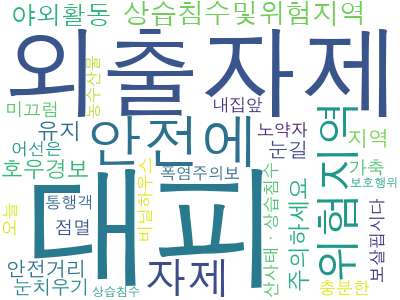

In [63]:
font = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
wc = WordCloud(font_path = font, 
            background_color='white',
            max_words=30,
            width=400, height=300)
cloud = wc.generate_from_frequencies(d)
cloud.to_image()

In [56]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(max_features=100, tokenizer=extract_nouns)

# tdm = cv.fit_transform(df[df.cast =='국민안전처'].msg)
# freq_df = pd.DataFrame({
#     '단어': cv.get_feature_names_out(),
#     '빈도': tdm.sum(axis=0).flat
#     })

In [ ]:
freq_df.sort_values('빈도', ascending=False)

,단어,빈도
98,확진자,40
28,발생,27
32,방역,20
76,준수,19
83,착용,18
...,...,...
49,시30,2
21,당부,2
55,실내마스크,2
54,실내,2


In [ ]:
font = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
wc = WordCloud(font_path = font, 
            background_color='white',
            max_words=30,
            width=400, height=300)
cloud = wc.generate_from_frequencies(freq_df)
cloud.to_file(f'cloud_{i}.png')
    

In [204]:
cnt_loc.cnt.describe()

count    1048.000000
mean        2.255725
std         2.712148
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        21.000000
Name: cnt, dtype: float64

In [259]:
import pandas as pd
import folium
import webbrowser
 
# Load the shape of the zone (US states)
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# You have to download this file and set the directory where you saved it
state_geo = 'sig/sig.json'



In [262]:
cnt_loc['sig'] = cnt_loc.EMD_CD.astype('str').str[:5]

/var/folders/1b/dx8_94fs0q740wx3lfknk6y40000gn/T/ipykernel_82463/2041431819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnt_loc['sig'] = cnt_loc.EMD_CD.astype('str').str[:5]


In [263]:
cnt_loc

,id,법정동코드,법정동(시도),법정동(시군구),법정동(읍면동),EMD_CD,geometry,center_point,경도,위도,id,cnt,sig
0,6488,26710330.0,부산광역시,기장군,철마면,26710330,"POLYGON ((117.99370 19.69471, 117.99370 19.694...",POINT (117.99380 19.69486),117.993799,19.694856,6488,1,26710
1,6591,27170101.0,대구광역시,서구,내당동,27170101,"POLYGON ((117.99370 19.69471, 117.99370 19.694...",POINT (117.99379 19.69486),117.993793,19.694861,6591,1,27170
2,6593,27170103.0,대구광역시,서구,평리동,27170103,"POLYGON ((117.99370 19.69471, 117.99370 19.694...",POINT (117.99379 19.69486),117.993793,19.694861,6593,1,27170
3,6594,27170104.0,대구광역시,서구,상리동,27170104,"POLYGON ((117.99370 19.69471, 117.99370 19.694...",POINT (117.99379 19.69486),117.993793,19.694861,6594,3,27170
4,6595,27170105.0,대구광역시,서구,중리동,27170105,"POLYGON ((117.99370 19.69471, 117.99370 19.694...",POINT (117.99379 19.69486),117.993793,19.694861,6595,1,27170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,11542,43740380.0,충청북도,영동군,학산면,43740380,"POLYGON ((117.99370 19.69471, 117.99370 19.694...",POINT (117.99379 19.69486),117.993785,19.694863,11542,2,43740
1044,11543,43740390.0,충청북도,영동군,양산면,43740390,"POLYGON ((117.99370 19.69471, 117.99370 19.694...",POINT (117.99378 19.69486),117.993785,19.694863,11543,2,43740
1045,11544,43740400.0,충청북도,영동군,심천면,43740400,"POLYGON ((117.99370 19.69471, 117.99370 19.694...",POINT (117.99379 19.69486),117.993785,19.694864,11544,2,43740
1046,11554,43760250.0,충청북도,괴산군,괴산읍,43760250,"POLYGON ((117.99370 19.69471, 117.99370 19.694...",POINT (117.99379 19.69487),117.993786,19.694870,11554,2,43760


In [264]:
state_data = cnt_loc.groupby(['sig']).count()[['cnt']]

In [265]:
state_data.reset_index(inplace=True)

In [271]:
state_data.iloc[0].sig = '11200A'

/var/folders/1b/dx8_94fs0q740wx3lfknk6y40000gn/T/ipykernel_82463/2420417689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data.iloc[0].sig = '11200A'


In [274]:
state_data.loc[0,'sig']= '11200A'

In [277]:
state_data

,sig,cnt
0,11200A,8
1,11215,1
2,11260,4
3,11320,2
4,11350,4
...,...,...
107,51170,27
108,51230,35
109,51720,2
110,51790,5


In [280]:
####### 도로명주소 위도 경도 값으로 바꿔주기 ########
from geopy.geocoders import Nominatim
geo_local = Nominatim(user_agent='South Korea')

# 위도, 경도 반환하는 함수
def geocoding(address):
    try:
        geo = geo_local.geocode(address)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

In [283]:
loc_df = pd.read_excel('korea_administrative_division_latitude_longitude.xlsx')

In [289]:
cnt_loc

,id,법정동코드,법정동(시도),법정동(시군구),법정동(읍면동),EMD_CD,geometry,center_point,경도,위도,id,cnt,sig
0,6488,26710330.0,부산광역시,기장군,철마면,26710330,"POLYGON ((117.99370 19.69471, 117.99370 19.694...",POINT (117.99380 19.69486),117.993799,19.694856,6488,1,26710
1,6591,27170101.0,대구광역시,서구,내당동,27170101,"POLYGON ((117.99370 19.69471, 117.99370 19.694...",POINT (117.99379 19.69486),117.993793,19.694861,6591,1,27170
2,6593,27170103.0,대구광역시,서구,평리동,27170103,"POLYGON ((117.99370 19.69471, 117.99370 19.694...",POINT (117.99379 19.69486),117.993793,19.694861,6593,1,27170
3,6594,27170104.0,대구광역시,서구,상리동,27170104,"POLYGON ((117.99370 19.69471, 117.99370 19.694...",POINT (117.99379 19.69486),117.993793,19.694861,6594,3,27170
4,6595,27170105.0,대구광역시,서구,중리동,27170105,"POLYGON ((117.99370 19.69471, 117.99370 19.694...",POINT (117.99379 19.69486),117.993793,19.694861,6595,1,27170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,11542,43740380.0,충청북도,영동군,학산면,43740380,"POLYGON ((117.99370 19.69471, 117.99370 19.694...",POINT (117.99379 19.69486),117.993785,19.694863,11542,2,43740
1044,11543,43740390.0,충청북도,영동군,양산면,43740390,"POLYGON ((117.99370 19.69471, 117.99370 19.694...",POINT (117.99378 19.69486),117.993785,19.694863,11543,2,43740
1045,11544,43740400.0,충청북도,영동군,심천면,43740400,"POLYGON ((117.99370 19.69471, 117.99370 19.694...",POINT (117.99379 19.69486),117.993785,19.694864,11544,2,43740
1046,11554,43760250.0,충청북도,괴산군,괴산읍,43760250,"POLYGON ((117.99370 19.69471, 117.99370 19.694...",POINT (117.99379 19.69487),117.993786,19.694870,11554,2,43760


In [291]:
loc_df

,docity,do,city,longitude,latitude
0,강원강릉시,강원,강릉시,128.878497,37.749136
1,강원고성군,강원,고성군,128.470164,38.377961
2,강원동해시,강원,동해시,129.116633,37.521931
3,강원삼척시,강원,삼척시,129.167489,37.447086
4,강원속초시,강원,속초시,128.594167,38.204275
...,...,...,...,...,...
290,충청충주시,충청,충주시,127.928144,36.988181
291,충청태안군,충청,태안군,126.299975,36.742667
292,충청한누리대로,충청,한누리대로,127.289926,36.485450
293,충청홍성군,충청,홍성군,126.662908,36.598361


In [293]:
cnt_loc = loc_df.merge(cnt_loc, left_on='city', right_on='법정동(시군구)')

In [294]:
cnt_loc

,docity,do,city,longitude,latitude,id,법정동코드,법정동(시도),법정동(시군구),법정동(읍면동),EMD_CD,geometry,center_point,경도,위도,id,cnt,sig
0,강원강릉시,강원,강릉시,128.878497,37.749136,9246,51150340.0,강원특별자치도,강릉시,강동면,51150340,"POLYGON ((117.99370 19.69471, 117.99370 19.694...",POINT (117.99380 19.69488),117.993796,19.694878,9246,2,51150
1,강원고성군,강원,고성군,128.470164,38.377961,9700,51820250.0,강원특별자치도,고성군,간성읍,51820250,"POLYGON ((117.99370 19.69471, 117.99370 19.694...",POINT (117.99379 19.69488),117.993790,19.694883,9700,2,51820
2,강원고성군,강원,고성군,128.470164,38.377961,9701,51820253.0,강원특별자치도,고성군,거진읍,51820253,"MULTIPOLYGON (((117.99370 19.69471, 117.99370 ...",POINT (117.99379 19.69488),117.993791,19.694884,9701,2,51820
3,강원고성군,강원,고성군,128.470164,38.377961,9703,51820320.0,강원특별자치도,고성군,죽왕면,51820320,"MULTIPOLYGON (((117.99370 19.69471, 117.99370 ...",POINT (117.99379 19.69488),117.993791,19.694883,9703,2,51820
4,강원고성군,강원,고성군,128.470164,38.377961,9704,51820330.0,강원특별자치도,고성군,토성면,51820330,"MULTIPOLYGON (((117.99370 19.69471, 117.99370 ...",POINT (117.99379 19.69488),117.993791,19.694883,9704,2,51820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,충청충주시,충청,충주시,127.928144,36.988181,11441,43130360.0,충청북도,충주시,노은면,43130360,"POLYGON ((117.99370 19.69471, 117.99370 19.694...",POINT (117.99379 19.69487),117.993785,19.694872,11441,1,43130
1258,충청충주시,충청,충주시,127.928144,36.988181,11442,43130370.0,충청북도,충주시,앙성면,43130370,"POLYGON ((117.99370 19.69471, 117.99370 19.694...",POINT (117.99379 19.69487),117.993785,19.694872,11442,2,43130
1259,충청충주시,충청,충주시,127.928144,36.988181,11447,43130420.0,충청북도,충주시,엄정면,43130420,"POLYGON ((117.99370 19.69471, 117.99370 19.694...",POINT (117.99379 19.69487),117.993787,19.694872,11447,1,43130
1260,충청충주시,충청,충주시,127.928144,36.988181,11448,43130430.0,충청북도,충주시,소태면,43130430,"POLYGON ((117.99370 19.69471, 117.99370 19.694...",POINT (117.99379 19.69487),117.993786,19.694872,11448,1,43130


In [296]:
# Initialize the map:
m = folium.Map(location=[36, 127], tiles="OpenStreetMap", zoom_start=7)
# m = folium.Map(
#     location=[37.559819, 126.963895],
#     zoom_start=11, 
# )

# I can add marker one by one on the map
for i in range(0,len(cnt_loc)):
    latitude = cnt_loc.iloc[i]['latitude']
    longitude = cnt_loc.iloc[i]['longitude']
    location=(latitude, longitude)
    folium.CircleMarker(location, radius=int(cnt_loc.iloc[i]['cnt'] / 10), color='#3186cc',fill_color='#3186cc', popup=cnt_loc.iloc[i]['법정동(읍면동)']).add_to(m)


folium.LayerControl(collapsed=False).add_to(m)
m
# Save to html
m.save(os.path.join('kr_polulation.html'))
# m
# webbrowser.open_new("kr_polulation.html")